In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf2


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
#from keras.optimizers import optimizers


In [2]:
pd.options.mode.chained_assignment = None

In [3]:
lf = pd.read_excel("LP1.xlsx")
df = pd.read_excel("LP2.xlsx")
gf = pd.read_excel("LP3.xlsx")
bf = pd.read_excel("LP4.xlsx")
mf = pd.read_excel("LP5.xlsx")

In [4]:
lf

,normal,Fx,Fy,Fz,Tx,Ty,Tz
0,NaN,-1.0,-1.0,63.0,-3.0,-1.0,0.0
1,NaN,0.0,0.0,62.0,-3.0,-1.0,0.0
2,NaN,-1.0,-1.0,61.0,-3.0,0.0,0.0
3,NaN,-1.0,-1.0,63.0,-2.0,-1.0,0.0
4,NaN,-1.0,-1.0,63.0,-3.0,-1.0,0.0
...,...,...,...,...,...,...,...
1576,NaN,-10.0,2.0,39.0,-21.0,-24.0,5.0
1577,NaN,-11.0,2.0,38.0,-24.0,-22.0,6.0
1578,NaN,-12.0,3.0,23.0,-24.0,-24.0,5.0
1579,NaN,-13.0,4.0,26.0,-29.0,-27.0,5.0


In [5]:
lfnew = lf[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].copy()
dfnew = df[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].copy()
gfnew = gf[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].copy()
bfnew = bf[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].copy()
mfnew = mf[["Fx", "Fy", "Fz", "Tx", "Ty", "Tz"]].copy()

In [6]:
lf2=lfnew.dropna()
df2=dfnew.dropna()
gf2=gfnew.dropna()
bf2=bfnew.dropna()
mf2=mfnew.dropna()

In [7]:
lf2
df2
gf2
bf2
mf2

,Fx,Fy,Fz,Tx,Ty,Tz
0,-2.0,-1.0,81.0,0.0,-5.0,0.0
1,-2.0,-1.0,79.0,0.0,-4.0,0.0
2,-2.0,-1.0,79.0,0.0,-4.0,0.0
3,-2.0,-1.0,80.0,0.0,-4.0,0.0
4,-3.0,-1.0,79.0,1.0,-5.0,1.0
...,...,...,...,...,...,...
2944,1.0,1.0,8.0,0.0,3.0,-4.0
2945,0.0,0.0,5.0,0.0,3.0,-4.0
2946,-1.0,1.0,-3.0,-3.0,-2.0,-3.0
2947,0.0,-1.0,-5.0,-1.0,1.0,-3.0


In [8]:
lf2 = lf2.reset_index(drop = True)
df2 = df2.reset_index(drop = True)
gf2 = gf2.reset_index(drop = True)
bf2 = bf2.reset_index(drop = True)
mf2 = mf2.reset_index(drop = True)

In [9]:
lf2['F'] = np.sqrt((lf2['Fx']**2) + (lf2['Fy']**2) + (lf2['Fz']**2))
df2['F'] = np.sqrt((df2['Fx']**2) + (df2['Fy']**2) + (df2['Fz']**2))
gf2['F'] = np.sqrt((gf2['Fx']**2) + (gf2['Fy']**2) + (gf2['Fz']**2))
bf2['F'] = np.sqrt((bf2['Fx']**2) + (bf2['Fy']**2) + (bf2['Fz']**2))
mf2['F'] = np.sqrt((mf2['Fx']**2) + (mf2['Fy']**2) + (mf2['Fz']**2))

In [10]:
lf2

,Fx,Fy,Fz,Tx,Ty,Tz,F
0,-1.0,-1.0,63.0,-3.0,-1.0,0.0,63.015871
1,0.0,0.0,62.0,-3.0,-1.0,0.0,62.000000
2,-1.0,-1.0,61.0,-3.0,0.0,0.0,61.016391
3,-1.0,-1.0,63.0,-2.0,-1.0,0.0,63.015871
4,-1.0,-1.0,63.0,-3.0,-1.0,0.0,63.015871
...,...,...,...,...,...,...,...
1315,-10.0,2.0,39.0,-21.0,-24.0,5.0,40.311289
1316,-11.0,2.0,38.0,-24.0,-22.0,6.0,39.610605
1317,-12.0,3.0,23.0,-24.0,-24.0,5.0,26.115130
1318,-13.0,4.0,26.0,-29.0,-27.0,5.0,29.342802


In [11]:
lf2
df2
gf2
bf2
mf2

,Fx,Fy,Fz,Tx,Ty,Tz,F
0,-2.0,-1.0,81.0,0.0,-5.0,0.0,81.030858
1,-2.0,-1.0,79.0,0.0,-4.0,0.0,79.031639
2,-2.0,-1.0,79.0,0.0,-4.0,0.0,79.031639
3,-2.0,-1.0,80.0,0.0,-4.0,0.0,80.031244
4,-3.0,-1.0,79.0,1.0,-5.0,1.0,79.063266
...,...,...,...,...,...,...,...
2455,1.0,1.0,8.0,0.0,3.0,-4.0,8.124038
2456,0.0,0.0,5.0,0.0,3.0,-4.0,5.000000
2457,-1.0,1.0,-3.0,-3.0,-2.0,-3.0,3.316625
2458,0.0,-1.0,-5.0,-1.0,1.0,-3.0,5.099020


In [12]:
lf2['T'] = np.sqrt((lf2['Tx']**2) + (lf2['Ty']**2) + (lf2['Tz']**2))
df2['T'] = np.sqrt((df2['Tx']**2) + (df2['Ty']**2) + (df2['Tz']**2))
gf2['T'] = np.sqrt((gf2['Tx']**2) + (gf2['Ty']**2) + (gf2['Tz']**2))
bf2['T'] = np.sqrt((bf2['Tx']**2) + (bf2['Ty']**2) + (bf2['Tz']**2))
mf2['T'] = np.sqrt((mf2['Tx']**2) + (mf2['Ty']**2) + (mf2['Tz']**2))

In [13]:
lf2
df2
gf2
bf2
mf2

,Fx,Fy,Fz,Tx,Ty,Tz,F,T
0,-2.0,-1.0,81.0,0.0,-5.0,0.0,81.030858,5.000000
1,-2.0,-1.0,79.0,0.0,-4.0,0.0,79.031639,4.000000
2,-2.0,-1.0,79.0,0.0,-4.0,0.0,79.031639,4.000000
3,-2.0,-1.0,80.0,0.0,-4.0,0.0,80.031244,4.000000
4,-3.0,-1.0,79.0,1.0,-5.0,1.0,79.063266,5.196152
...,...,...,...,...,...,...,...,...
2455,1.0,1.0,8.0,0.0,3.0,-4.0,8.124038,5.000000
2456,0.0,0.0,5.0,0.0,3.0,-4.0,5.000000,5.000000
2457,-1.0,1.0,-3.0,-3.0,-2.0,-3.0,3.316625,4.690416
2458,0.0,-1.0,-5.0,-1.0,1.0,-3.0,5.099020,3.316625


In [14]:
lf3 = lf2[["F" , "T"]].copy()
df3 = df2[["F" , "T"]].copy()
gf3 = gf2[["F" , "T"]].copy()
bf3 = bf2[["F" , "T"]].copy()
mf3 = mf2[["F" , "T"]].copy()

In [15]:
lf3
df3
gf3
bf3
mf3

,F,T
0,81.030858,5.000000
1,79.031639,4.000000
2,79.031639,4.000000
3,80.031244,4.000000
4,79.063266,5.196152
...,...,...
2455,8.124038,5.000000
2456,5.000000,5.000000
2457,3.316625,4.690416
2458,5.099020,3.316625


In [16]:
lf4 = lf3.groupby(np.arange(len(lf3))//15).mean()
df4 = df3.groupby(np.arange(len(df3))//15).mean()
gf4 = gf3.groupby(np.arange(len(gf3))//15).mean()
bf4 = bf3.groupby(np.arange(len(bf3))//15).mean()
mf4 = mf3.groupby(np.arange(len(mf3))//15).mean()

In [17]:
lf4


,F,T
0,62.547733,2.984690
1,62.188271,4.495996
2,61.161357,5.130615
3,62.240630,6.954296
4,60.635057,7.824947
...,...,...
83,716.648808,354.643550
84,33.820787,34.681896
85,165.947581,100.586308
86,999.434102,416.935284


In [18]:
lf5 = pd.read_excel("LP1types.xlsx")
df5 = pd.read_excel("LP2types.xlsx")
gf5 = pd.read_excel("LP3types.xlsx")
bf5 = pd.read_excel("LP4types.xlsx")
mf5 = pd.read_excel("LP5types.xlsx")

In [19]:
lf5
df5
gf5
bf5
mf5

,Failure_type
0,normal
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2929,NaN
2930,NaN
2931,NaN
2932,NaN


In [20]:
lf5 = lf5.dropna(axis = 0)
df5 = df5.dropna(axis = 0)
gf5 = gf5.dropna(axis = 0)
bf5 = bf5.dropna(axis = 0)
mf5 = mf5.dropna(axis = 0)

In [21]:
lf5 = lf5.reset_index(drop = True)
df5 = df5.reset_index(drop = True)
gf5 = gf5.reset_index(drop = True)
bf5 = bf5.reset_index(drop = True)
mf5 = mf5.reset_index(drop = True)

In [22]:
lf5
df5
gf5
bf5
mf5

,Failure_type
0,normal
1,normal
2,normal
3,normal
4,normal
...,...
159,collision_in_tool
160,collision_in_tool
161,collision_in_tool
162,collision_in_tool


In [23]:
lf4["Failure_type"] = lf5
df4["Failure_type"] = df5
gf4["Failure_type"] = gf5
bf4["Failure_type"] = bf5
mf4["Failure_type"] = mf5

In [24]:
lf4
df4
gf4
bf4
mf4

,F,T,Failure_type
0,79.567705,4.312334,normal
1,80.314413,15.539557,normal
2,78.836939,16.678349,normal
3,81.325723,18.469327,normal
4,78.934791,20.417522,normal
...,...,...,...
159,10.218050,11.476806,collision_in_tool
160,14.654321,17.638316,collision_in_tool
161,9.702304,8.781054,collision_in_tool
162,13.977992,15.875220,collision_in_tool


In [25]:
lf4.to_csv('LP1F.csv', index = False)
df4.to_csv('LP2F.csv', index = False)
gf4.to_csv('LP3F.csv', index = False)
bf4.to_csv('LP4F.csv', index = False)
mf4.to_csv('LP5F.csv', index = False)

<AxesSubplot:xlabel='Failure_type', ylabel='count'>

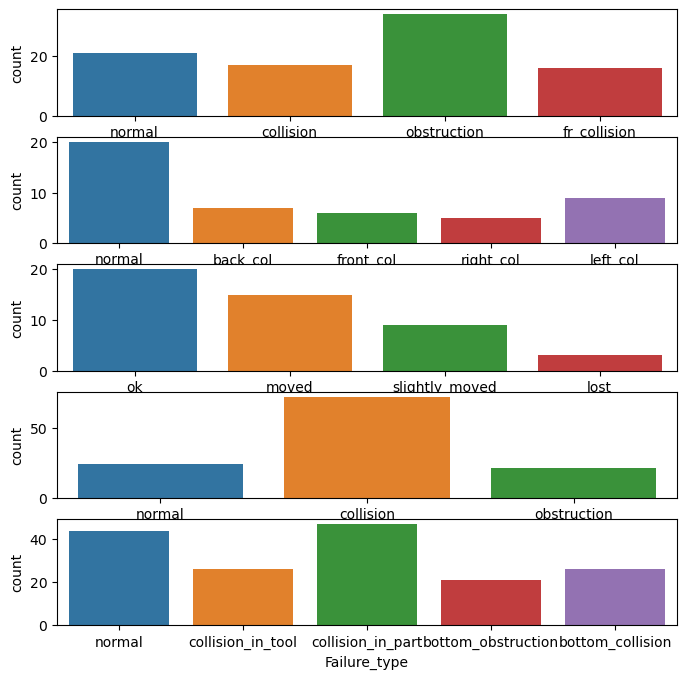

In [26]:
fig, axes = plt.subplots(5,figsize=(8, 8))
sns.countplot(x = "Failure_type", data = lf4, ax =axes[0])
sns.countplot(x= "Failure_type", data = df4, ax =axes[1])
sns.countplot(x= "Failure_type", data = gf4, ax =axes[2])
sns.countplot(x= "Failure_type", data = bf4, ax =axes[3])
sns.countplot(x= "Failure_type", data = mf4, ax =axes[4])


<AxesSubplot:xlabel='F'>

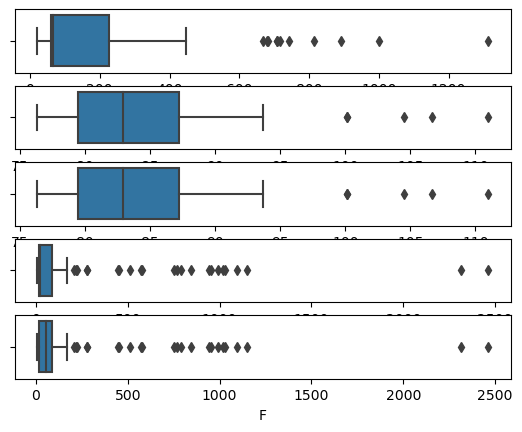

In [27]:
fig, axes = plt.subplots(5)
sns.boxplot(x = "F", data = lf4, ax =axes[0])
sns.boxplot(x= "F", data = df4, ax =axes[1])
sns.boxplot(x= "F", data = gf4, ax =axes[2])
sns.boxplot(x= "F", data = bf4, ax =axes[3])
sns.boxplot(x= "F", data = mf4, ax =axes[4])

<AxesSubplot:xlabel='T'>

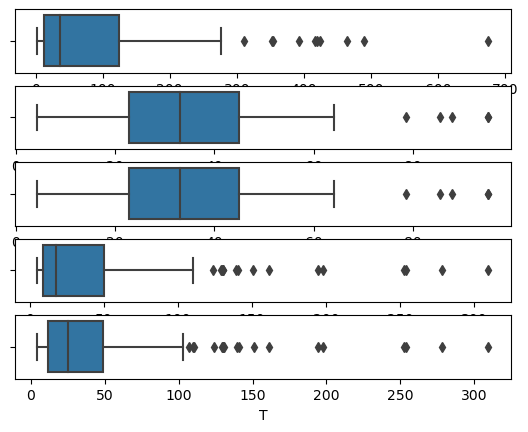

In [28]:
fig, axes = plt.subplots(5)
sns.boxplot(x = "T", data = lf4, ax =axes[0])
sns.boxplot(x= "T", data = df4, ax =axes[1])
sns.boxplot(x= "T", data = gf4, ax =axes[2])
sns.boxplot(x= "T", data = bf4, ax =axes[3])
sns.boxplot(x= "T", data = mf4, ax =axes[4])

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lf3.Failure_type = le.fit_transform(lf3.Failure_type)
lf3

AttributeError: 'DataFrame' object has no attribute 'Failure_type'